# Ejercicio 1

En conjunto con el desafío te compartimos un archivo llamado ofertas_relampago.csv el cual posee información 
de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado.
Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de
unidades (stock) comprometidas.El objetivo de este desafío es hacer un EDA sobre estos datos 
buscando insights sobre este tipo de ofertas.

In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("/Users/jgarate/Downloads/ofertas_relampago.csv")

In [27]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [28]:
df.isnull().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [34]:
df.corr()

/var/folders/hk/qlqtlt5559d5t5l_hbh09qgh2_yfz_/T/ipykernel_4500/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
INVOLVED_STOCK,1.000000,0.994240,0.405859,0.557684
REMAINING_STOCK_AFTER_END,0.994240,1.000000,0.354320,0.484031
SOLD_AMOUNT,0.405859,0.354320,1.000000,0.708884
SOLD_QUANTITY,0.557684,0.484031,0.708884,1.000000


In [35]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

OFFER_START_DATE: 61 valores únicos
OFFER_START_DTTM: 783 valores únicos
OFFER_FINISH_DTTM: 7578 valores únicos
OFFER_TYPE: 1 valores únicos
INVOLVED_STOCK: 505 valores únicos
REMAINING_STOCK_AFTER_END: 801 valores únicos
SOLD_AMOUNT: 7603 valores únicos
SOLD_QUANTITY: 373 valores únicos
ORIGIN: 1 valores únicos
SHIPPING_PAYMENT_TYPE: 2 valores únicos
DOM_DOMAIN_AGG1: 36 valores únicos
VERTICAL: 9 valores únicos
DOMAIN_ID: 1266 valores únicos


In [36]:
avg_sold_amount = df['SOLD_AMOUNT'].mean()
print(f"Cantidad promedio vendida: {avg_sold_amount}")

Cantidad promedio vendida: 51.208897839619176


In [37]:
df['tasa_de_ventas'] = (df['SOLD_AMOUNT'] / df['INVOLVED_STOCK']) * 100
print(df[['OFFER_START_DATE', 'tasa_de_ventas']])

      OFFER_START_DATE  tasa_de_ventas
0           2021-06-22      118.000000
1           2021-06-22             NaN
2           2021-06-22       71.533333
3           2021-06-22       46.866667
4           2021-06-22      264.333333
...                ...             ...
48741       2021-06-19      108.533333
48742       2021-06-19             NaN
48743       2021-06-19      332.400000
48744       2021-06-19      775.800000
48745       2021-06-19             NaN

[48746 rows x 2 columns]


In [38]:
mejores_categorias = df.groupby('VERTICAL')['SOLD_AMOUNT'].sum().sort_values(ascending=False)
print(mejores_categorias)

VERTICAL
BEAUTY & HEALTH    547427.27
CE                 362787.94
HOME & INDUSTRY    155518.68
APP & SPORTS       131101.36
ACC                 26819.98
CPG                 16787.68
T & B               14302.78
ENTERTAINMENT        1988.57
OTHERS               1929.24
Name: SOLD_AMOUNT, dtype: float64


In [39]:
df['HORA_INICIO_OFERTA'] = pd.to_datetime(df['OFFER_START_DTTM']).dt.hour
horas_pico = df['HORA_INICIO_OFERTA'].value_counts().sort_index()
print(horas_pico)

0         1
1        54
2         9
3         8
4         1
5         1
6        10
7     12574
8        55
9        89
10      380
11     1268
12     2226
13    14287
14      987
15     1228
16      828
17     1354
18      321
19    12884
20      113
21       43
22       21
23        4
Name: HORA_INICIO_OFERTA, dtype: int64


In [40]:
impacto_envio = df.groupby('SHIPPING_PAYMENT_TYPE')['SOLD_AMOUNT'].mean()
print(impacto_envio)

SHIPPING_PAYMENT_TYPE
free_shipping    63.792067
none             39.714082
Name: SOLD_AMOUNT, dtype: float64


In [42]:
tasa_promedio_por_categoria = df.groupby('VERTICAL')['tasa_de_ventas'].mean().sort_values(ascending=False)
print(tasa_promedio_por_categoria)

VERTICAL
CE                 469.714353
ACC                264.335717
BEAUTY & HEALTH    250.169234
HOME & INDUSTRY    240.806465
OTHERS             213.251947
T & B              197.487988
APP & SPORTS       193.513621
ENTERTAINMENT      190.844984
CPG                149.781465
Name: tasa_de_ventas, dtype: float64


In [43]:
import matplotlib.pyplot as plt

In [44]:
df_filtered = df.dropna(subset=['tasa_de_ventas', 'HORA_INICIO_OFERTA'])

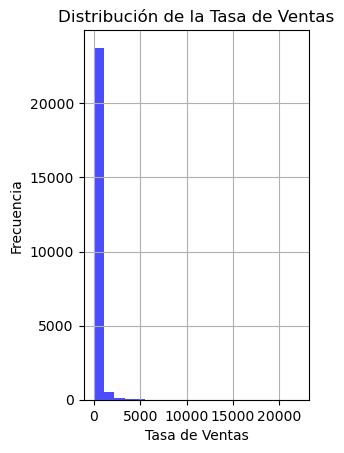

In [46]:
plt.subplot(1, 2, 1)
plt.hist(df_filtered['tasa_de_ventas'], bins=20, color='b', alpha=0.7, label='Tasa de Ventas')
plt.xlabel('Tasa de Ventas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Tasa de Ventas')
plt.grid(True)

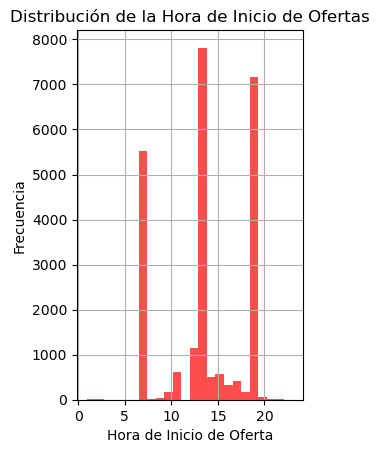

In [47]:
plt.subplot(1, 2, 2)
plt.hist(df_filtered['HORA_INICIO_OFERTA'], bins=24, color='r', alpha=0.7, label='Hora de Inicio de Oferta')
plt.xlabel('Hora de Inicio de Oferta')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Hora de Inicio de Ofertas')
plt.grid(True)